# Rodada de testes

In [6]:
import duckdb
from stations_selections_utils import testar_multiplos_parametros_gp,precalcular_distancias_intersecoes,get_distancias,get_intersecoes
import os

## Teste 1

In [ ]:
# Explorando diversos cenários para as estações vizinhas
ouro_conn = duckdb.connect('ouro_db')
os.makedirs("testes_goal_programming", exist_ok=True)

valores_peso_distancia = [1, 2, 5, 10]
valores_peso_intersecao = [1]
valores_min_estacoes_candidatas = [2]
valores_max_estacoes_candidatas = [4]
valores_max_distancia = [20, 50, 100]
valores_min_intersecao = [80, 160]

estacoes = ouro_conn.execute('select distinct id_estacao from dim_estacoes').fetch_df()['id_estacao'].tolist()
distancias_dict, intersecoes_dict = precalcular_distancias_intersecoes(estacoes,get_distancias,get_intersecoes,ouro_conn)

testar_multiplos_parametros_gp(valores_peso_distancia,valores_peso_intersecao,valores_min_estacoes_candidatas,valores_max_estacoes_candidatas,valores_max_distancia,valores_min_intersecao,estacoes,distancias_dict,intersecoes_dict)

## Teste 2

In [37]:
# Explorando diversos cenários para as estações vizinhas
ouro_conn = duckdb.connect('ouro_db')
os.makedirs("testes_goal_programming", exist_ok=True)

valores_peso_distancia = [1]
valores_peso_intersecao = [1,2,4]
valores_min_estacoes_candidatas = [1,2]
valores_max_estacoes_candidatas = [4,6]
valores_max_distancia = [50]
valores_min_intersecao = [160]

estacoes = ouro_conn.execute('select distinct id_estacao from dim_estacoes').fetch_df()['id_estacao'].tolist()
distancias_dict, intersecoes_dict = precalcular_distancias_intersecoes(estacoes,get_distancias,get_intersecoes,ouro_conn)

testar_multiplos_parametros_gp(valores_peso_distancia,valores_peso_intersecao,valores_min_estacoes_candidatas,valores_max_estacoes_candidatas,valores_max_distancia,valores_min_intersecao,estacoes,distancias_dict,intersecoes_dict)

Pré-calculando distâncias e interseções:   0%|          | 0/4455 [00:00<?, ?it/s]

Testando combinações de parâmetros:   0%|          | 0/12 [00:00<?, ?it/s]

Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 1 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 2 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 3 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 4 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 5 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 6 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 7 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 8 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 9 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 10 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 11 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 12 finalizada


## Teste 3

In [ ]:
# Explorando diversos cenários para as estações vizinhas
ouro_conn = duckdb.connect('ouro_db')
os.makedirs("testes_goal_programming", exist_ok=True)

valores_peso_distancia = [1, 2, 5, 10]
valores_peso_intersecao = [1, 2, 5]
valores_min_estacoes_candidatas = [1,2]
valores_max_estacoes_candidatas = [4]
valores_max_distancia = [20, 50, 100]
valores_min_intersecao = [80, 120, 160]

estacoes = ouro_conn.execute('select distinct id_estacao from dim_estacoes').fetch_df()['id_estacao'].tolist()
distancias_dict, intersecoes_dict = precalcular_distancias_intersecoes(estacoes,get_distancias,get_intersecoes,ouro_conn)

testar_multiplos_parametros_gp(valores_peso_distancia,valores_peso_intersecao,valores_min_estacoes_candidatas,valores_max_estacoes_candidatas,valores_max_distancia,valores_min_intersecao,estacoes,distancias_dict,intersecoes_dict)

Pré-calculando distâncias e interseções:   0%|          | 0/4455 [00:00<?, ?it/s]

Testando combinações de parâmetros:   0%|          | 0/216 [00:00<?, ?it/s]

Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

Tentativa 1 finalizada


Calculando estações candidatas:   0%|          | 0/4455 [00:00<?, ?it/s]

# Analisando os testes

## Teste 1

In [1]:
import json
from stations_selections_utils import gerar_relatorio_vizinhas,comparar_tentativas_vizinhas
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

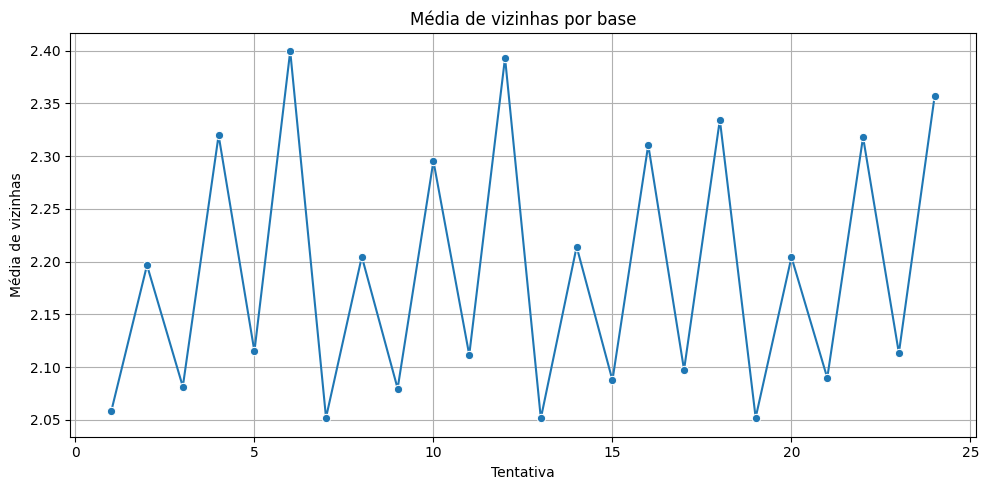

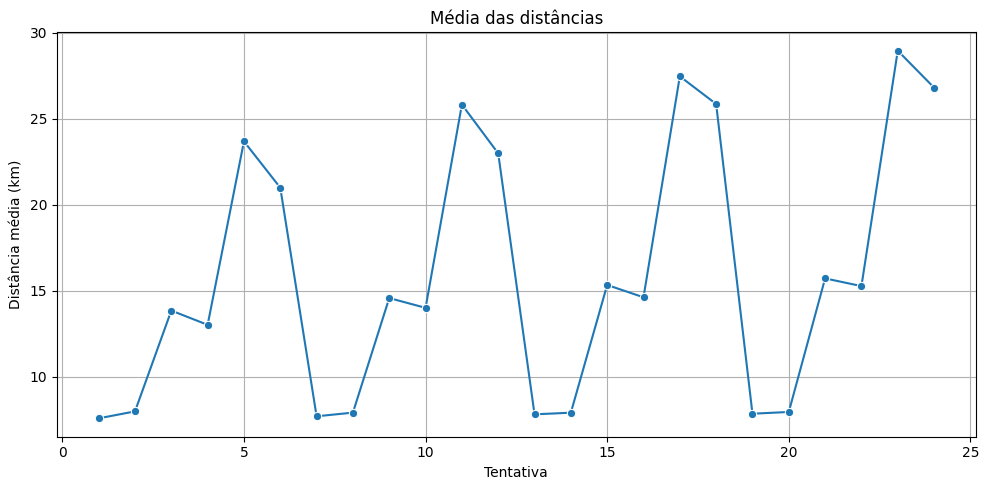

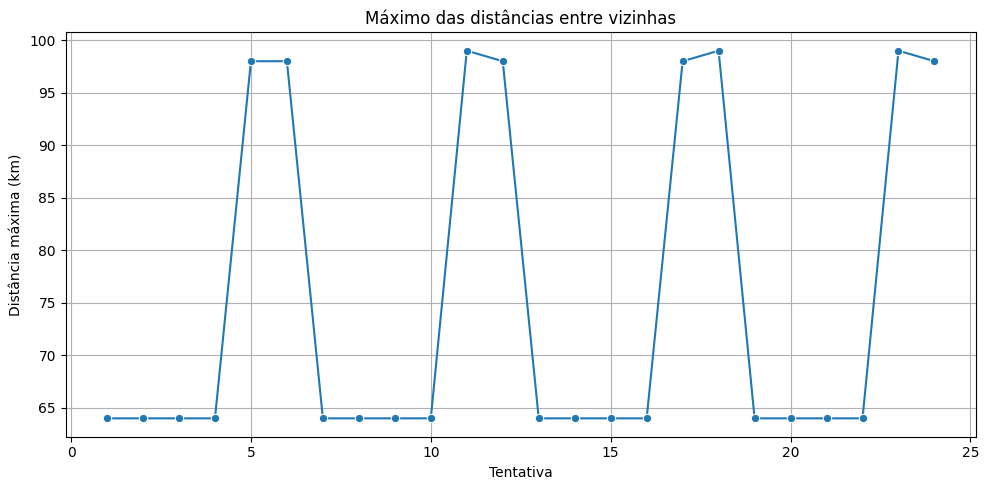

In [2]:
path_prefix = 'testes_goal_programming/tentativa_'
numeros_tentativas = range(1,25)
paths = {n_tentativa:f'{path_prefix}{n_tentativa}.json' for n_tentativa in numeros_tentativas}
tentativas = {}
for n_tentativa,path in paths.items():
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        tentativas[n_tentativa] = data


ouro_conn = duckdb.connect('ouro_db')
fato_estacoes_distancia = ouro_conn.execute("select * from fato_estacoes_distancia").fetchdf()

resumo = comparar_tentativas_vizinhas(
    tentativas=tentativas.values(),
    df_distancias=fato_estacoes_distancia,
    plotar=True
)

In [ ]:
tentativas_com_maiores_distancias = resumo.loc[resumo['max_das_distancias']==resumo['max_das_distancias'].max(),'tentativa'].tolist()
print(f"Parâmetros que levaram às maiores distâncias entre estação base e estações candidatas")
for n_tentativa,tentativa in {k:v for k,v in tentativas.items() if k in tentativas_com_maiores_distancias}.items():
    print(f"Tentativa {n_tentativa}")
    for k,v in tentativa['Parametros'].items():
        if k in ['peso_distancia','max_distancia_aceita','min_intersecao_aceito']:
            print(f'> {k}: {v}')
    print()

print()
tentativas_com_menores_distancias = resumo.loc[resumo['max_das_distancias']==resumo['max_das_distancias'].min(),'tentativa'].tolist()
print(f"Parâmetros que levaram às menores distâncias entre estação base e estações candidatas")
for n_tentativa,tentativa in {k:v for k,v in tentativas.items() if k in tentativas_com_menores_distancias}.items():
    print(f"Tentativa {n_tentativa}")
    for k,v in tentativa['Parametros'].items():
        if k in ['peso_distancia','max_distancia_aceita','min_intersecao_aceito']:
            print(f'> {k}: {v}')
    print()

Parâmetros que levaram às maiores distâncias entre estação base e estações candidatas
Tentativa 11
> peso_distancia: 2
> max_distancia_aceita: 100
> min_intersecao_aceito: 80

Tentativa 18
> peso_distancia: 5
> max_distancia_aceita: 100
> min_intersecao_aceito: 160

Tentativa 23
> peso_distancia: 10
> max_distancia_aceita: 100
> min_intersecao_aceito: 80


Parâmetros que levaram às menores distâncias entre estação base e estações candidatas
Tentativa 1
> peso_distancia: 1
> max_distancia_aceita: 20
> min_intersecao_aceito: 80

Tentativa 2
> peso_distancia: 1
> max_distancia_aceita: 20
> min_intersecao_aceito: 160

Tentativa 3
> peso_distancia: 1
> max_distancia_aceita: 50
> min_intersecao_aceito: 80

Tentativa 4
> peso_distancia: 1
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 7
> peso_distancia: 2
> max_distancia_aceita: 20
> min_intersecao_aceito: 80

Tentativa 8
> peso_distancia: 2
> max_distancia_aceita: 20
> min_intersecao_aceito: 160

Tentativa 9
> peso_dista

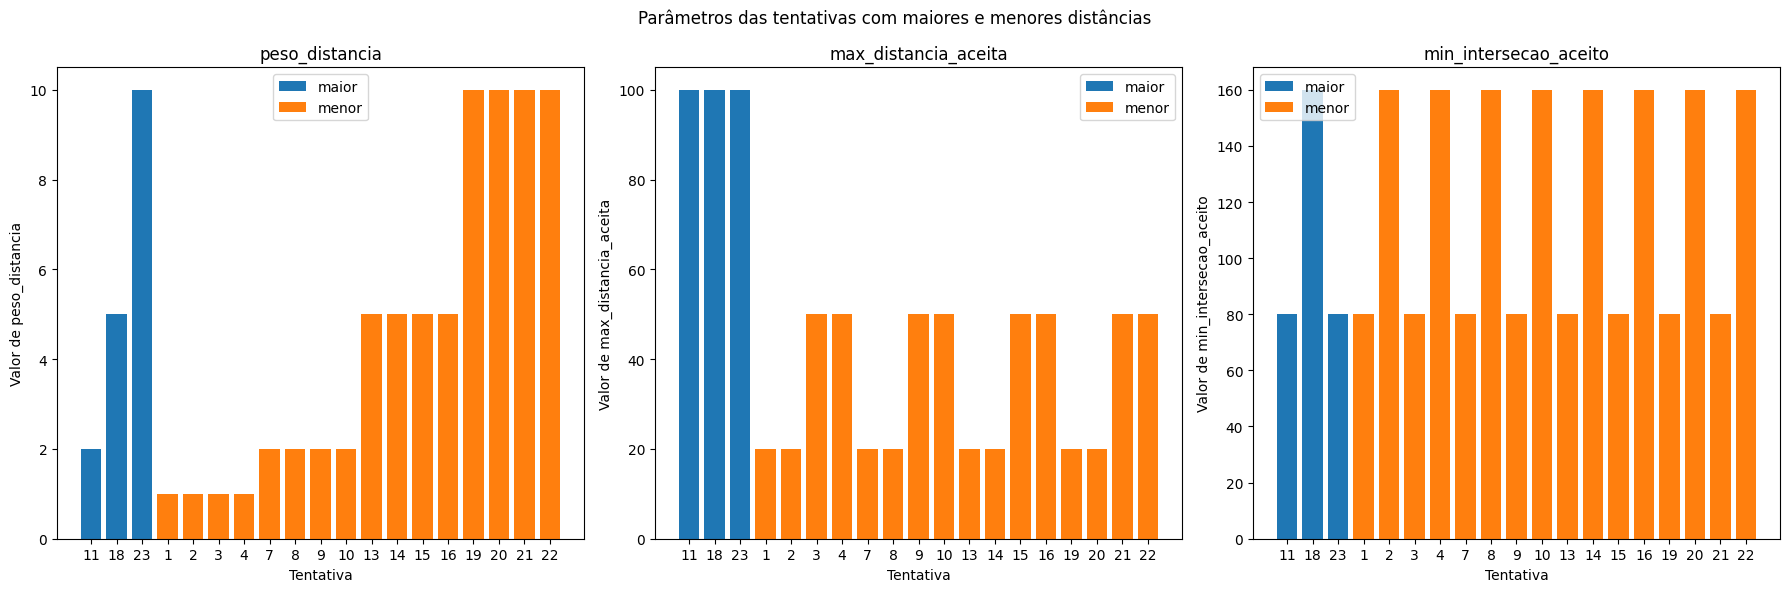

In [34]:
maior_dist = resumo['max_das_distancias'].max()
menor_dist = resumo['max_das_distancias'].min()

tentativas_maiores = resumo[resumo['max_das_distancias'] == maior_dist]['tentativa'].tolist()
tentativas_menores = resumo[resumo['max_das_distancias'] == menor_dist]['tentativa'].tolist()

def extrair_parametros(tentativas_ids, titulo):
    dados = []
    for n in tentativas_ids:
        params = tentativas[n]['Parametros']
        dados.append({
            'tentativa': n,
            'peso_distancia': params.get('peso_distancia'),
            'max_distancia_aceita': params.get('max_distancia_aceita'),
            'min_intersecao_aceito': params.get('min_intersecao_aceito')
        })
    return pd.DataFrame(dados)

df_maiores = extrair_parametros(tentativas_maiores, "Maiores Distâncias")
df_maiores['tipo'] = 'maior'

df_menores = extrair_parametros(tentativas_menores, "Menores Distâncias")
df_menores['tipo'] = 'menor'

df_plot = pd.concat([df_maiores, df_menores])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Eixos y independentes

for i, param in enumerate(['peso_distancia', 'max_distancia_aceita', 'min_intersecao_aceito']):
    ax = axs[i]
    for tipo, grupo in df_plot.groupby('tipo'):
        ax.bar(grupo['tentativa'].astype(str), grupo[param], label=tipo)
    ax.set_title(param)
    ax.set_xlabel('Tentativa')
    ax.set_ylabel(f'Valor de {param}')
    ax.legend()
    ax.tick_params(axis='x')

fig.suptitle('Parâmetros das tentativas com maiores e menores distâncias')
plt.tight_layout()
plt.show()

In [3]:
n_tentativa = 1
tentativa = tentativas[n_tentativa]

# Numero de estações
gerar_relatorio_vizinhas(tentativa['id_estacoes_vizinhas'],fato_estacoes_distancia)

📊 RELATÓRIO GERAL DAS ESTAÇÕES VIZINHAS
Total de estações base analisadas: 4455
Total de estações vizinhas atribuídas: 9168
Média de vizinhas por estação base: 2.06
Máximo de vizinhas atribuídas a uma base: 4
Mínimo de vizinhas atribuídas a uma base: 2
--------------------------------------------------
Número de estações base com menos de 3 vizinhas: 4226
IDs das estações base com poucas vizinhas: ['921094', '921096', '925529', '926233', '920171', '920206', '920240', '920346', '920379', '920386', '920430', '920451', '920462', '920470', '920477', '920481', '920523', '920533', '920649', '920657', '920677', '920678', '920694', '920696', '920779', '920838', '920864', '920912', '920930', '920995', '921011', '921012', '921026', '921061', '921062', '921077', '921079', '921267', '921352', '921361', '921363', '921712', '921721', '921732', '921736', '921753', '921769', '921780', '921781', '921786', '921788', '921822', '921823', '921824', '921847', '921884', '921907', '921910', '922055', '922060'

2.0579124579124577

## Teste 2

In [1]:
import json
from stations_selections_utils import gerar_relatorio_vizinhas,comparar_tentativas_vizinhas
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

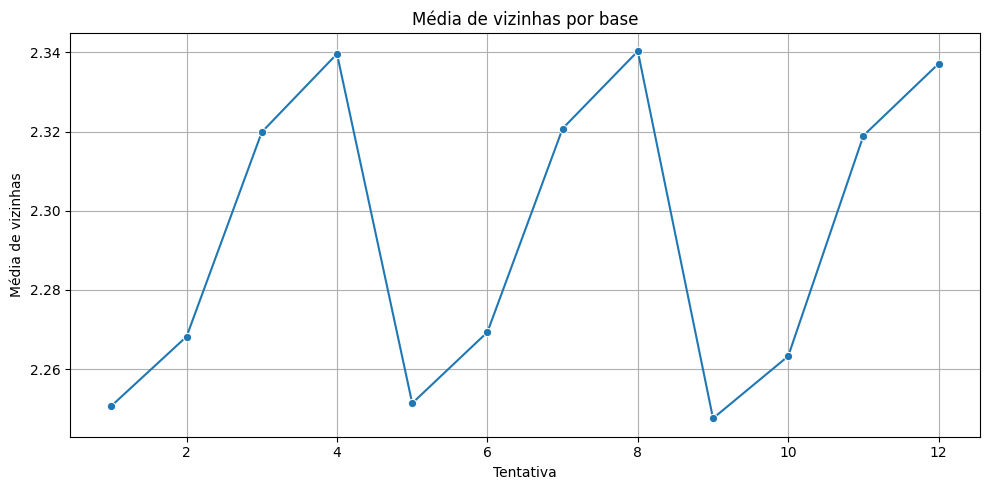

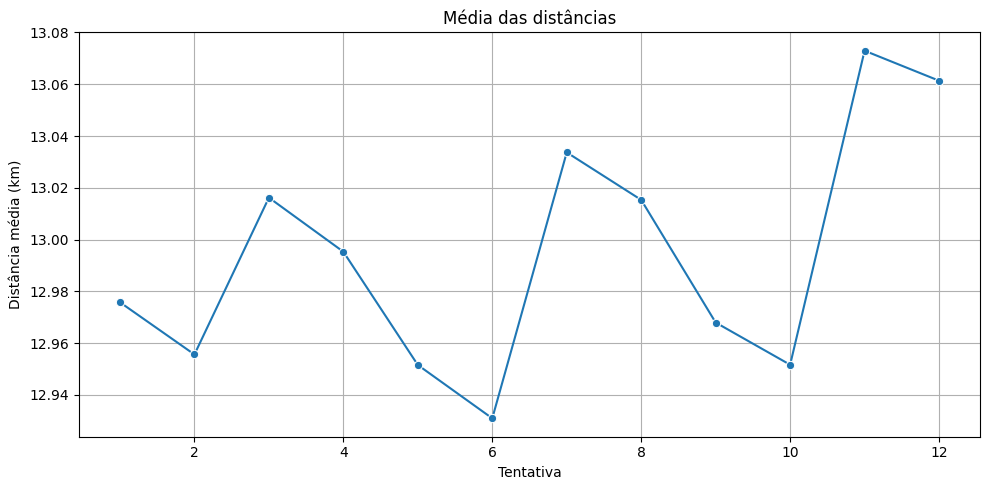

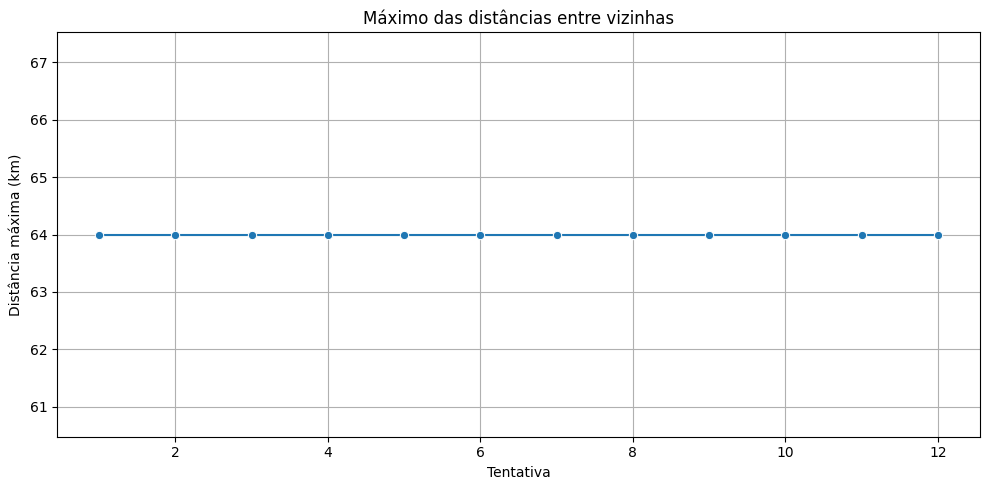

In [2]:
path_prefix = 'testes_goal_programming/tentativa_'
numeros_tentativas = range(1,13)
paths = {n_tentativa:f'{path_prefix}{n_tentativa}.json' for n_tentativa in numeros_tentativas}
tentativas = {}
for n_tentativa,path in paths.items():
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        tentativas[n_tentativa] = data


ouro_conn = duckdb.connect('ouro_db')
fato_estacoes_distancia = ouro_conn.execute("select * from fato_estacoes_distancia").fetchdf()

resumo = comparar_tentativas_vizinhas(
    tentativas=tentativas.values(),
    df_distancias=fato_estacoes_distancia,
    plotar=True
)

In [3]:
tentativas_com_maiores_distancias = resumo.loc[resumo['max_das_distancias']==resumo['max_das_distancias'].max(),'tentativa'].tolist()
print(f"Parâmetros que levaram às maiores distâncias entre estação base e estações candidatas")
for n_tentativa,tentativa in {k:v for k,v in tentativas.items() if k in tentativas_com_maiores_distancias}.items():
    print(f"Tentativa {n_tentativa}")
    for k,v in tentativa['Parametros'].items():
        print(f'> {k}: {v}')
    print()

print()
tentativas_com_menores_distancias = resumo.loc[resumo['max_das_distancias']==resumo['max_das_distancias'].min(),'tentativa'].tolist()
print(f"Parâmetros que levaram às menores distâncias entre estação base e estações candidatas")
for n_tentativa,tentativa in {k:v for k,v in tentativas.items() if k in tentativas_com_menores_distancias}.items():
    print(f"Tentativa {n_tentativa}")
    if k in ['peso_distancia','max_distancia_aceita','min_intersecao_aceito']:
            print(f'> {k}: {v}')
    print()

Parâmetros que levaram às maiores distâncias entre estação base e estações candidatas
Tentativa 1
> peso_distancia: 1
> peso_intersecao: 1
> min_estacoes_candidatas: 1
> max_estacoes_candidatas: 4
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 2
> peso_distancia: 1
> peso_intersecao: 1
> min_estacoes_candidatas: 1
> max_estacoes_candidatas: 6
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 3
> peso_distancia: 1
> peso_intersecao: 1
> min_estacoes_candidatas: 2
> max_estacoes_candidatas: 4
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 4
> peso_distancia: 1
> peso_intersecao: 1
> min_estacoes_candidatas: 2
> max_estacoes_candidatas: 6
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 5
> peso_distancia: 1
> peso_intersecao: 2
> min_estacoes_candidatas: 1
> max_estacoes_candidatas: 4
> max_distancia_aceita: 50
> min_intersecao_aceito: 160

Tentativa 6
> peso_distancia: 1
> peso_intersecao: 2
> min_estacoes_candid

In [4]:
resumo

,tentativa,num_bases,total_vizinhas,media_vizinhas_por_base,media_das_distancias,max_das_distancias,media_das_intersecoes,max_das_intersecoes
0,1,4455,10027,2.250730,12.975795,64,None,None
1,2,4455,10105,2.268238,12.955642,64,None,None
2,3,4455,10335,2.319865,13.016199,64,None,None
3,4,4455,10423,2.339618,12.995312,64,None,None
4,5,4455,10030,2.251403,12.951590,64,None,None
5,6,4455,10110,2.269360,12.930988,64,None,None
6,7,4455,10339,2.320763,13.033670,64,None,None
7,8,4455,10426,2.340292,13.015335,64,None,None
8,9,4455,10013,2.247587,12.967976,64,None,None
9,10,4455,10083,2.263300,12.951680,64,None,None


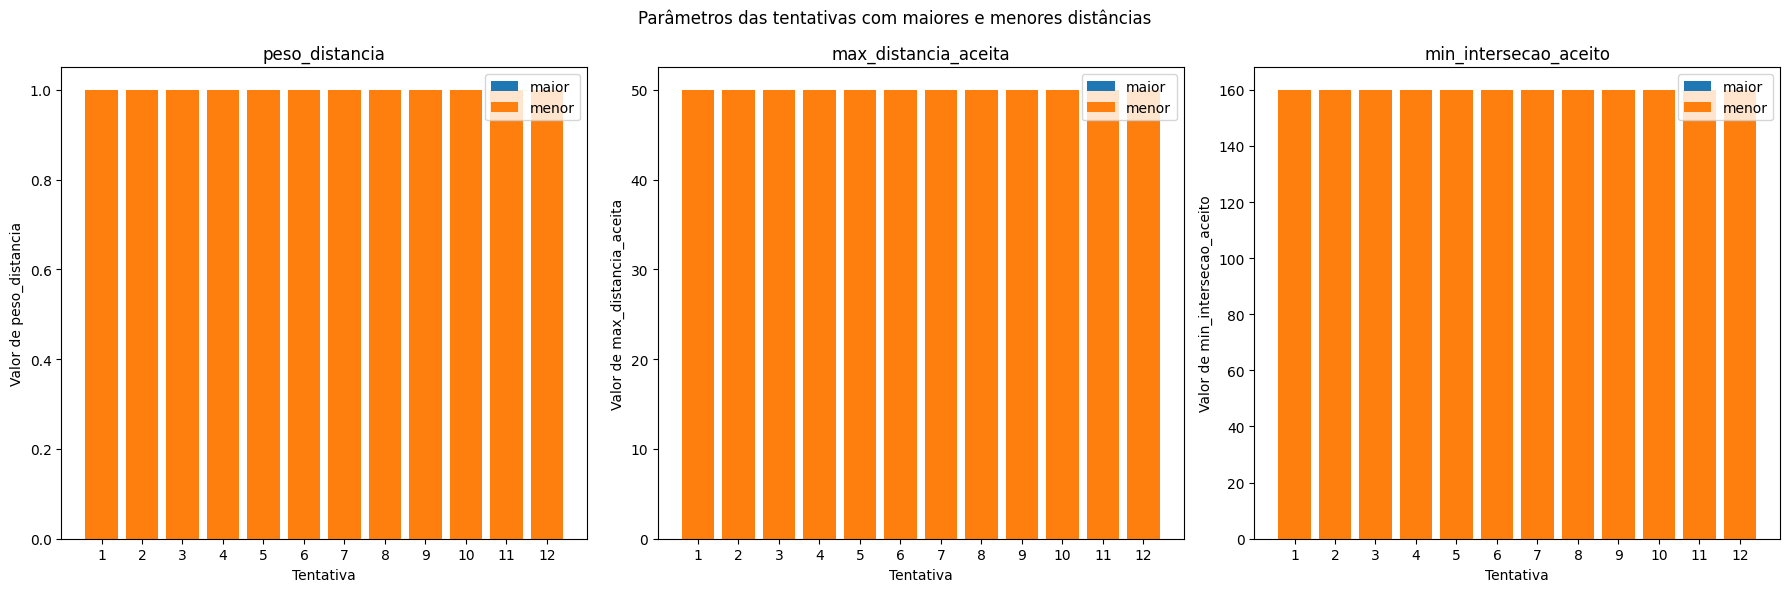

In [4]:
maior_dist = resumo['max_das_distancias'].max()
menor_dist = resumo['max_das_distancias'].min()

tentativas_maiores = resumo[resumo['max_das_distancias'] == maior_dist]['tentativa'].tolist()
tentativas_menores = resumo[resumo['max_das_distancias'] == menor_dist]['tentativa'].tolist()

def extrair_parametros(tentativas_ids, titulo):
    dados = []
    for n in tentativas_ids:
        params = tentativas[n]['Parametros']
        dados.append({
            'tentativa': n,
            'peso_distancia': params.get('peso_distancia'),
            'max_distancia_aceita': params.get('max_distancia_aceita'),
            'min_intersecao_aceito': params.get('min_intersecao_aceito')
        })
    return pd.DataFrame(dados)

df_maiores = extrair_parametros(tentativas_maiores, "Maiores Distâncias")
df_maiores['tipo'] = 'maior'

df_menores = extrair_parametros(tentativas_menores, "Menores Distâncias")
df_menores['tipo'] = 'menor'

df_plot = pd.concat([df_maiores, df_menores])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Eixos y independentes

for i, param in enumerate(['peso_distancia', 'max_distancia_aceita', 'min_intersecao_aceito']):
    ax = axs[i]
    for tipo, grupo in df_plot.groupby('tipo'):
        ax.bar(grupo['tentativa'].astype(str), grupo[param], label=tipo)
    ax.set_title(param)
    ax.set_xlabel('Tentativa')
    ax.set_ylabel(f'Valor de {param}')
    ax.legend()
    ax.tick_params(axis='x')

fig.suptitle('Parâmetros das tentativas com maiores e menores distâncias')
plt.tight_layout()
plt.show()